# CIFAR10 data set

## Loading the CIFAR10 data set

In [0]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from tensorflow import keras
from keras.optimizers import SGD
from tensorflow.keras import Model

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Exploring the format of the CIFAR10 data set

In [0]:
train_images.shape

In [0]:
len(train_images)

In [0]:
train_images.ndim

In [0]:
train_images.dtype

In [0]:
train_labels

In [0]:
train_labels.shape

In [0]:
len(train_labels)

## Displaying CIFAR10 images

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
import matplotlib.pyplot as plt

In [0]:
index = 0
image = train_images[index]

In [0]:
image.shape

In [0]:
plt.figure(figsize=(2, 2))
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [0]:
label = train_labels[index, 0]
label

In [0]:
class_names[label]

In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

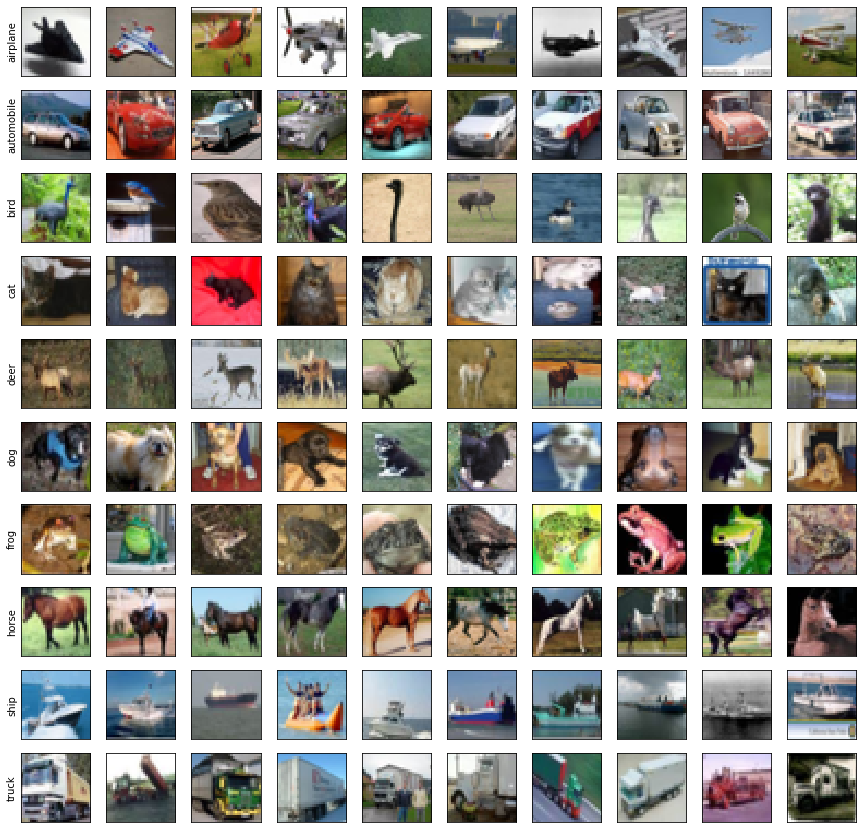

In [747]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

---



In [754]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 32x32x3: 32x32 for the image pixels, and 3 for
# the three color channels: R, G, and B
# img_input = layers.Input(shape=(32, 32, 3))

# x = layers.Conv2D(128, 3, activation='relu')(img_input)
# x = layers.Dropout(0.1, noise_shape=None, seed=None)(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(256, 3, activation='relu')(x)
# x = layers.Dropout(0.2, noise_shape=None, seed=None)(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(512, 3, activation='relu')(x)
# x = layers.Dropout(0.4, noise_shape=None, seed=None)(x)
# x = layers.MaxPooling2D(2)(x)

# x = layers.Flatten()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dense(512, activation='relu')(x)
# output = layers.Dense(10, activation='softmax')(x)

model = keras.Sequential([
    
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
# model = Model(img_input, output)

model.summary()





Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
dropout_33 (Dropout)         (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 13, 13, 256)       295168    
_________________________________________________________________
dropout_34 (Dropout)         (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 6, 6, 256)         0  

In [0]:
from keras import optimizers

# compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

# fit model
history = model.fit(train_images,
                    train_labels,
                    epochs=15,
                    validation_data=(test_images, test_labels))
